In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [114]:
path = '../../data/titanic/train.csv'
df = pd.read_csv(path)

In [115]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [117]:
df.isnull().sum()
df_train = df

Default Rate: 0.3838383838383838


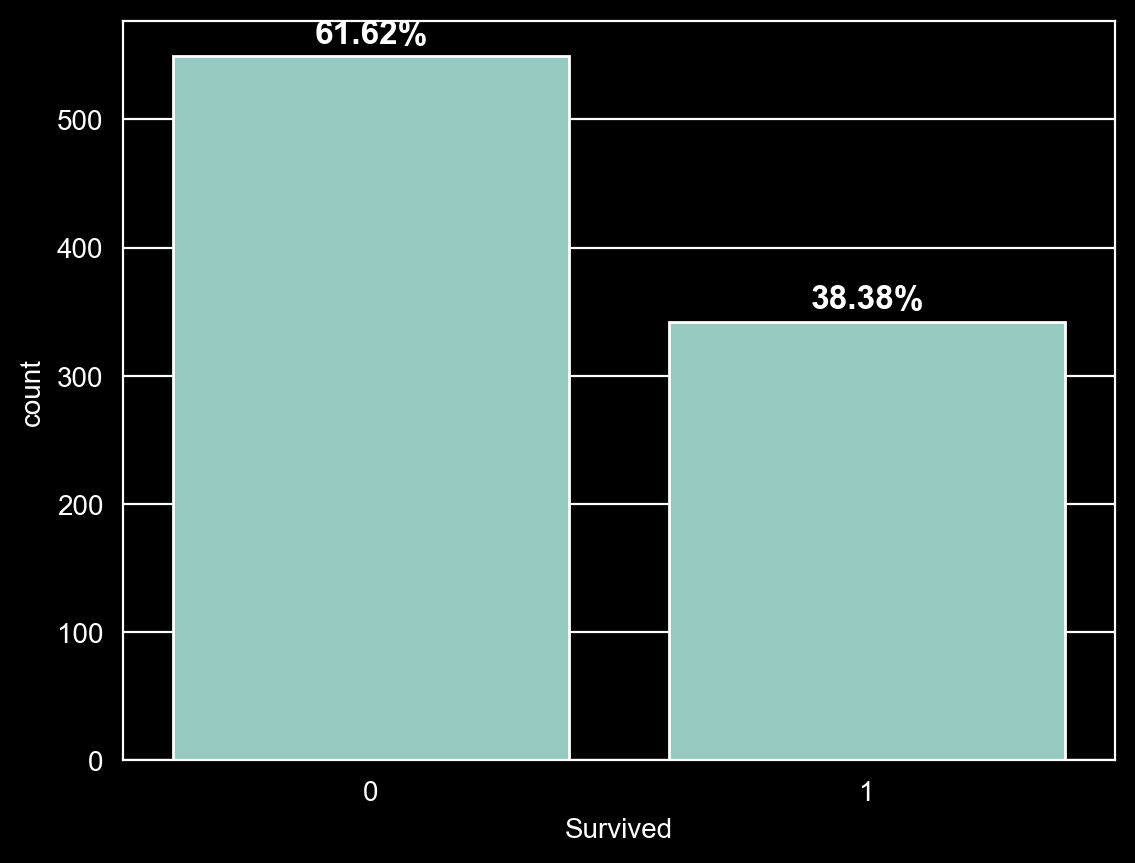

In [91]:
# 绘制计数图
ax = sns.countplot(x="Survived", data=df_train)  # 注意：示例数据列名是survived，你的是Survived，按需修改

# 计算总数（用于计算百分比）
total = len(df_train)

# 遍历每个柱子，添加百分比标签
for p in ax.patches:
    # 获取柱子高度（计数）
    count = p.get_height()
    # 计算百分比并保留两位小数
    percentage = f'{(count/total)*100:.2f}%'
    # 在柱子上方添加文本标签
    ax.text(
        p.get_x() + p.get_width()/2,  # x坐标（柱子中心）
        count + 5,                    # y坐标（柱子顶部+偏移，避免重叠）
        percentage,                   # 显示的文本（百分比）
        ha='center',                  # 水平居中
        va='bottom',                  # 垂直靠下
        fontsize=12,                  # 字体大小
        fontweight='bold'             # 字体加粗
    )

print("Default Rate: {}".format(df_train["Survived"].sum() / len(df_train)))

<Axes: xlabel='Age', ylabel='Count'>

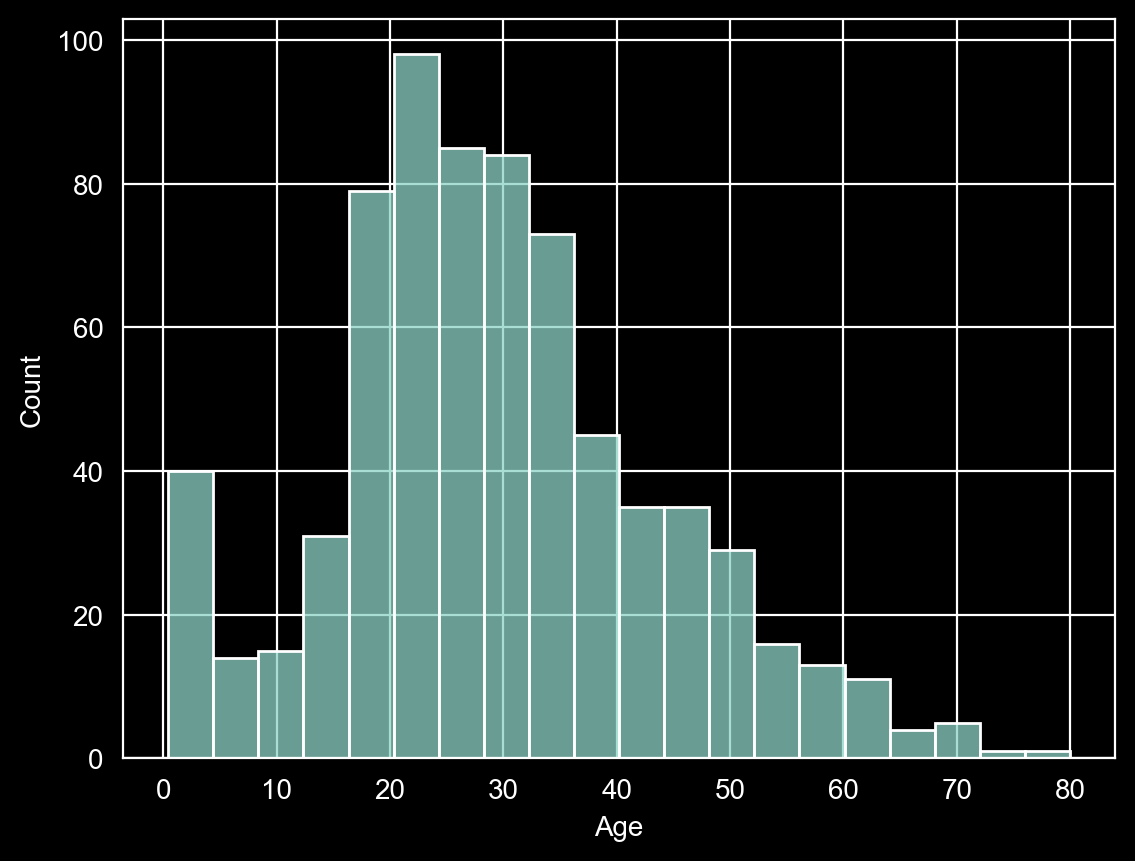

In [73]:
sns.histplot(df_train["Age"])

In [74]:
df_train.groupby(by=['Sex', 'Survived'])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [75]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [76]:
pd.crosstab(df_train.Pclass, df_train.Survived, margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


/Users/piguanghua/anaconda3/envs/paddle/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


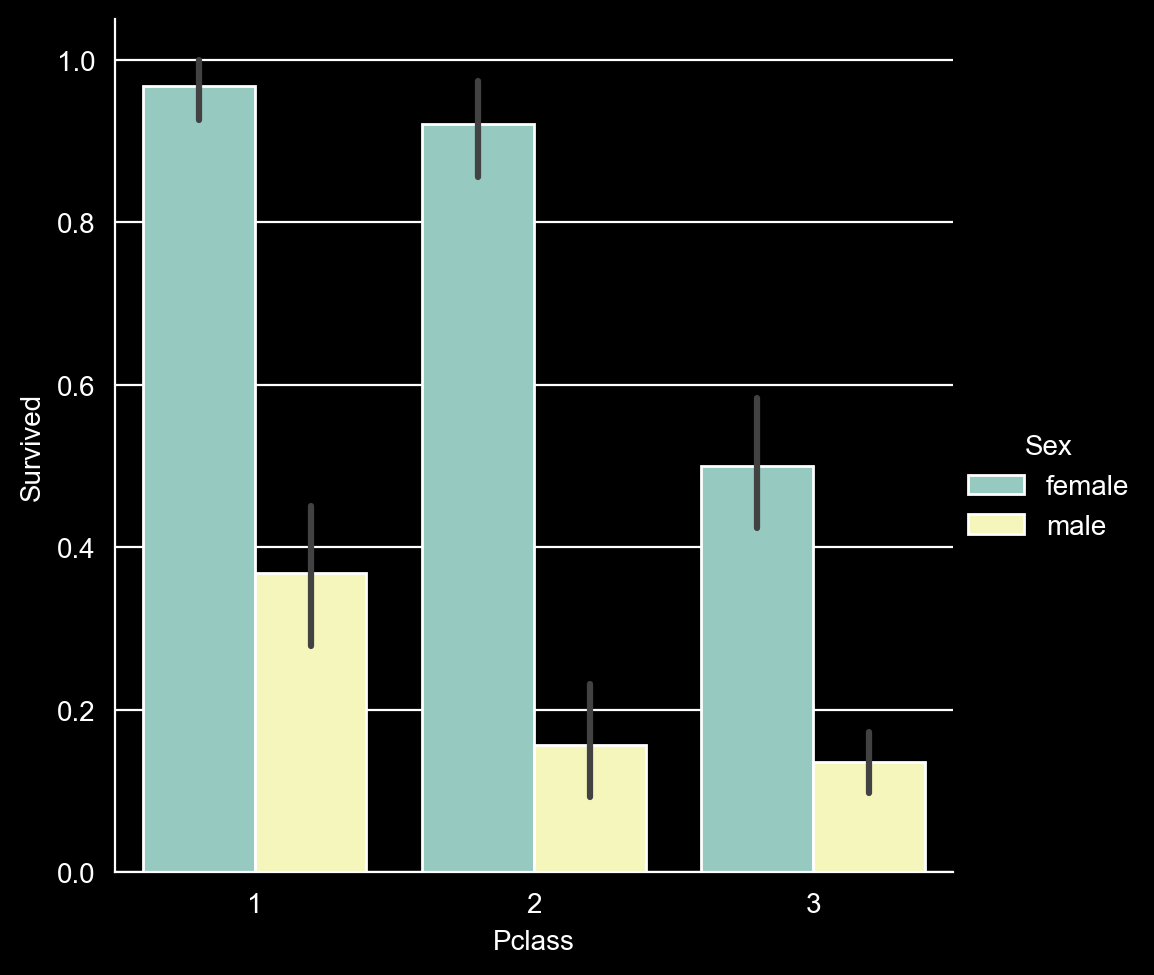

In [77]:
#两个维度下，见特征分析
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='bar')

In [78]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [120]:
df_train['Prefix'] = df_train['Name'].str.extract(r' ([A-Za-z]+\.) ')

In [98]:
pd.crosstab(df_train.Prefix, df_train.Sex, margins=True).T.style.background_gradient()

Prefix,Capt.,Col.,Countess.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0,314
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1,577
All,1,2,1,1,7,1,1,2,40,182,2,1,517,125,1,6,1,891


In [121]:
df_train.groupby('Prefix')['Age'].mean()

Prefix
Capt.        70.000000
Col.         58.000000
Countess.    33.000000
Don.         40.000000
Dr.          42.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       4.574167
Miss.        21.773973
Mlle.        24.000000
Mme.         24.000000
Mr.          32.368090
Mrs.         35.898148
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
Name: Age, dtype: float64

In [122]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Capt.'), 'Age'] = 70
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Col.'), 'Age'] = 58
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Countess.'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Don.'), 'Age'] = 40
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Dr.'), 'Age'] = 43
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Jonkheer.'), 'Age'] = 38
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Lady.'), 'Age'] = 48
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Major.'), 'Age'] = 48.5
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Master.'), 'Age'] = 4.5
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Miss.'), 'Age'] = 21.7

df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Mme.'), 'Age'] = 24
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Mr.'), 'Age'] = 32.36
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Mrs.'), 'Age'] = 35.8
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Ms.'), 'Age'] = 28
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Rev.'), 'Age'] = 43
df_train.loc[(df_train.Age.isnull()) & (df_train.Prefix == 'Sir.'), 'Age'] = 49

In [110]:
df_train.Age.isnull().any()

False

<Axes: xlabel='Age', ylabel='Count'>

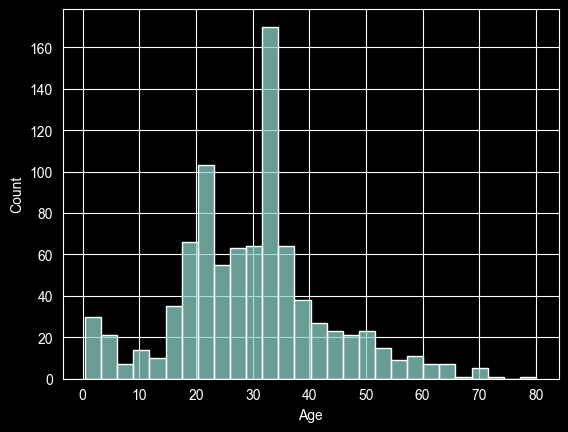

In [54]:
sns.histplot(df_train["Age"])

/var/folders/_0/bbnv7lfn63zb3nl9dhjkwf200000gn/T/ipykernel_33918/2749282680.py:38: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  plt.tight_layout()
/var/folders/_0/bbnv7lfn63zb3nl9dhjkwf200000gn/T/ipykernel_33918/2749282680.py:38: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from current font.
  plt.tight_layout()
/var/folders/_0/bbnv7lfn63zb3nl9dhjkwf200000gn/T/ipykernel_33918/2749282680.py:38: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
/var/folders/_0/bbnv7lfn63zb3nl9dhjkwf200000gn/T/ipykernel_33918/2749282680.py:38: UserWarning: Glyph 40836 (\N{CJK UNIFIED IDEOGRAPH-9F84}) missing from current font.
  plt.tight_layout()
/var/folders/_0/bbnv7lfn63zb3nl9dhjkwf200000gn/T/ipykernel_33918/2749282680.py:38: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from current font.
  plt.tight_layout()
/var/folders/_0/bbnv7lfn63zb3nl9dhjkwf200000gn/T/ipyker

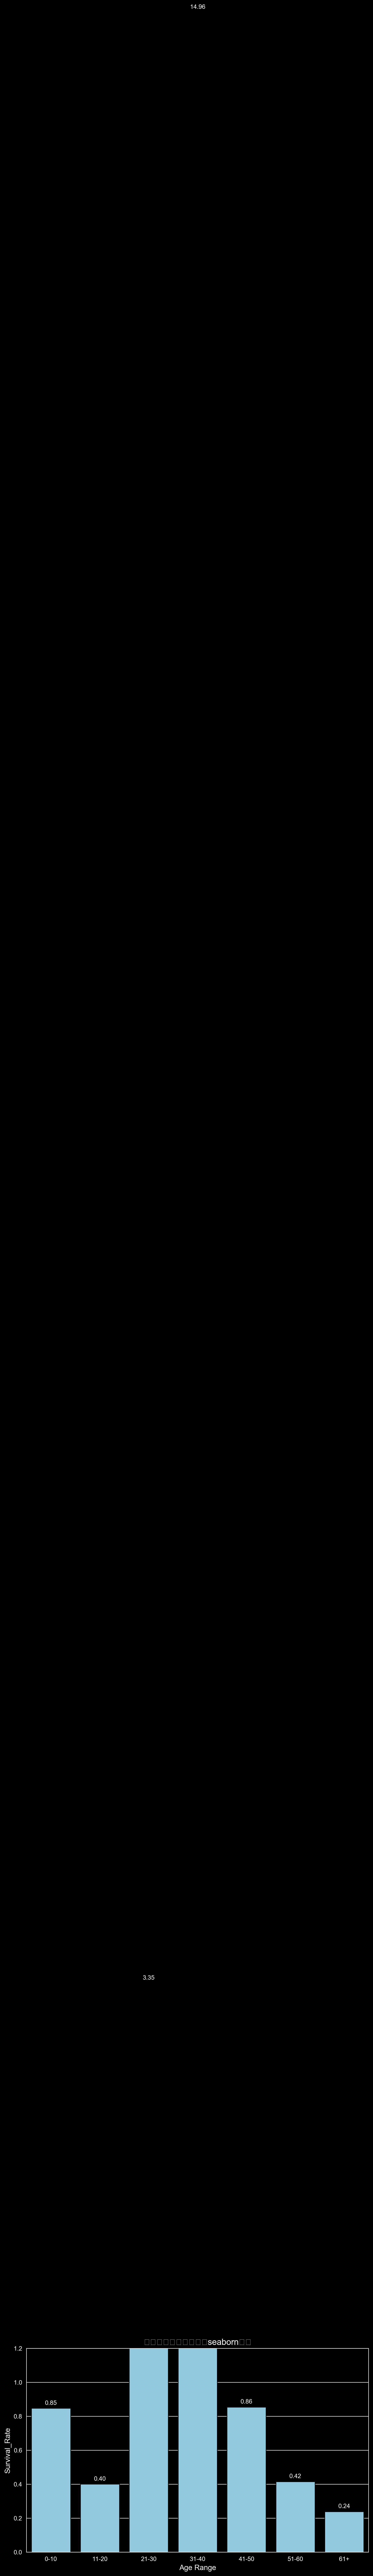

In [83]:
%matplotlib inline
# 可选：提高图表的显示分辨率
%config InlineBackend.figure_format = 'retina'
# 定义年龄区间
age_bins = [0, 10, 20, 30, 40, 50, 60, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61+']
# 给年龄分组
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
# 计算每个年龄段的生存率（Survived=1为生存，取均值就是生存率）
survival_rate = df.groupby('Age_Group')['Survived'].mean()

survival_df = df.groupby('Age_Group')['Survived'].mean().reset_index()
survival_df.rename(columns={'Survived': 'Survival_Rate'}, inplace=True)  # 重命名列更清晰

# ========== 3. 用seaborn直接绘制柱状图 ==========
plt.figure(figsize=(10, 6))
# 核心：sns.barplot绘制，x=年龄段，y=生存率
ax = sns.barplot(
    x='Age_Group',
    y='Survival_Rate',
    data=survival_df,
    color='skyblue',       # 柱子颜色
    edgecolor='black',     # 柱子边框颜色
    width=0.8              # 柱子宽度（可选）
)

# 添加标题和标签
plt.title('不同年龄段的生存率（seaborn版）', fontsize=14)
plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Survival_Rate', fontsize=12)

# 在柱子上显示具体数值（和之前逻辑一致）
for i, v in enumerate(survival_df['Survival_Rate']):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', fontsize=10)
# 调整y轴范围，让数值标签更美观
plt.ylim(0, 1.2)

plt.tight_layout()
plt.show()

In [124]:
# pd.crosstab(df_train.Embarked, df_train.Pclass, margins=True).T.style.background_gradient()
pd.crosstab([df_train.Embarked, df_train.Pclass],[df_train.Sex, df_train.Survived], margins=True).style.background_gradient()


In [123]:
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [127]:
df_train.Embarked.isnull().any()

False

In [126]:
df_train['Embarked'].fillna('S', inplace=True)

In [128]:
df_train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.


In [131]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [134]:
sex_mapping = {'male': 0, 'female': 1}
df_train['Sex_Num'] = df_train['Sex'].map(sex_mapping)
embarked_mapping = {'S': 0, 'C': 1, 'Q': 2}
df_train['Embarked_Num'] = df_train['Embarked'].map(embarked_mapping)

In [135]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Num,Embarked_Num
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.749506,0.523008,0.381594,32.204208,0.352413,0.361392
std,257.353842,0.486592,0.836071,13.279623,1.102743,0.806057,49.693429,0.477990,0.635673
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.700000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,668.500000,1.000000,3.000000,35.800000,1.000000,0.000000,31.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,2.000000


In [133]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [138]:
# 1. 选取特征列（feature1、feature2）和目标列（target）
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Num', 'Embarked_Num']]  # 选取部分列作为特征
y = df['Survived']
# 2. 划分训练测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 预测与评估
y_pred = lr_model.predict(X_test)
print(f"单次评估 - MSE: {mean_squared_error(y_test, y_pred):.4f}, R²: {r2_score(y_test, y_pred):.4f}")

# ---------------------- 3. 进阶版：K折交叉验证（KFold） ----------------------
print("\n===== 进阶版：5折交叉验证 =====")
# 定义KFold：n_splits=5 表示5折，shuffle=True 打乱数据（避免数据有序性影响）
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# 方法1：手动实现KFold
mse_scores = []
r2_scores = []

for train_idx, test_idx in kf.split(X):
    X_k_train, X_k_test = X.iloc[train_idx], X.iloc[test_idx]
    y_k_train, y_k_test = y.iloc[train_idx], y.iloc[test_idx]

    lr_model_k = LinearRegression()
    lr_model_k.fit(X_k_train, y_k_train)
    y_k_pred = lr_model_k.predict(X_k_test)

    mse_scores.append(mean_squared_error(y_k_test, y_k_pred))
    r2_scores.append(r2_score(y_k_test, y_k_pred))

print("手动实现KFold结果：")
print(f"5折平均 MSE: {np.mean(mse_scores):.4f} (标准差: {np.std(mse_scores):.4f})")
print(f"5折平均 R²: {np.mean(r2_scores):.4f} (标准差: {np.std(r2_scores):.4f})")



单次评估 - MSE: 0.1316, R²: 0.4574

===== 进阶版：5折交叉验证 =====
手动实现KFold结果：
5折平均 MSE: 0.1441 (标准差: 0.0167)
5折平均 R²: 0.3889 (标准差: 0.0768)


In [142]:
X.head(5)
y.head(5)
np.unique(y)

array([0, 1])

In [146]:
import numpy as np  # 补充缺失的导入
from sklearn.linear_model import LogisticRegression  # 逻辑回归模型
from sklearn.model_selection import KFold  # K折交叉验证
from sklearn.metrics import accuracy_score, classification_report  # 评估指标
from sklearn.preprocessing import StandardScaler  # 数据标准化（逻辑回归需要）

# ===================== 补充必要的初始化代码（你原代码中缺失的部分） =====================
# 模拟示例数据（你需要替换成自己的真实数据）
# X: 特征矩阵，y: 标签（确保y是离散的类别，如0/1，而非连续值）
np.random.seed(42)
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Num', 'Embarked_Num']]  # 选取部分列作为特征
y = df['Survived']

# 初始化逻辑回归模型
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 初始化5折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ===================== 你的核心代码（修复后） =====================
# 3. 执行K折交叉验证
# 逻辑回归对特征尺度敏感，先标准化特征（均值0，方差1）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

fold_scores = []  # 存储每折的准确率
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    # 划分训练集和验证集
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # 训练模型
    lr_model.fit(X_train, y_train)

    # 验证模型
    y_pred = lr_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    fold_scores.append(accuracy)

    # 打印每折的结果
    print(f"第 {fold} 折验证准确率: {accuracy:.4f}")

# 4. 输出整体结果
print("\n===== 5折交叉验证汇总 =====")
print(f"平均准确率: {np.mean(fold_scores):.4f}")
print(f"准确率标准差: {np.std(fold_scores):.4f}")

# 5. 训练最终模型（使用全部数据）并输出分类报告
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_scaled, y)
y_final_pred = final_model.predict(X_scaled)

# 修复关键问题：
# 1. 确保y是离散类别（提前检查/转换）
y = y.astype(int)  # 强制转换为整数类别（避免浮点数）
y_final_pred = y_final_pred.astype(int)

# 2. target_names改为列表形式（匹配你的类别数量）
print("\n===== 最终模型分类报告 =====")
print(classification_report(y, y_final_pred, target_names=['类别0', '类别1']))  # 二元分类的标签名

第 1 折验证准确率: 0.8045
第 2 折验证准确率: 0.7978
第 3 折验证准确率: 0.8427
第 4 折验证准确率: 0.7640
第 5 折验证准确率: 0.7865

===== 5折交叉验证汇总 =====
平均准确率: 0.7991
准确率标准差: 0.0258

===== 最终模型分类报告 =====
              precision    recall  f1-score   support

         类别0       0.82      0.86      0.84       549
         类别1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [148]:
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
import numpy as np  # 补充缺失的导入
from sklearn.model_selection import KFold  # K折交叉验证
from sklearn.metrics import accuracy_score, classification_report  # 评估指标
from sklearn.preprocessing import StandardScaler  # 数据标准化（逻辑回归需要）

# ===================== 补充必要的初始化代码（你原代码中缺失的部分） =====================
# 模拟示例数据（你需要替换成自己的真实数据）
# X: 特征矩阵，y: 标签（确保y是离散的类别，如0/1，而非连续值）
np.random.seed(42)
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_Num', 'Embarked_Num']]  # 选取部分列作为特征
y = df['Survived']

# 初始化逻辑回归模型
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


# 初始化5折交叉验证
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# ===================== 你的核心代码（修复后） =====================
# 3. 执行K折交叉验证
# 逻辑回归对特征尺度敏感，先标准化特征（均值0，方差1）
X_scaled = scaler.fit_transform(X)

fold_scores = []  # 存储每折的准确率
for fold, (train_idx, val_idx) in enumerate(kf.split(X_scaled), 1):
    # 划分训练集和验证集
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # 训练模型
    rf_model.fit(X_train, y_train)

    # 验证模型
    y_pred = rf_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    fold_scores.append(accuracy)

    # 打印每折的结果
    print(f"第 {fold} 折验证准确率: {accuracy:.4f}")

# 4. 输出整体结果
print("\n===== 5折交叉验证汇总 =====")
print(f"平均准确率: {np.mean(fold_scores):.4f}")
print(f"准确率标准差: {np.std(fold_scores):.4f}")

# 5. 训练最终模型（使用全部数据）并输出分类报告
final_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
final_model.fit(X, y)
y_final_pred = final_model.predict(X)

# 修复关键问题：
# 1. 确保y是离散类别（提前检查/转换）
y = y.astype(int)  # 强制转换为整数类别（避免浮点数）
y_final_pred = y_final_pred.astype(int)

# 2. target_names改为列表形式（匹配你的类别数量）
print("\n===== 最终模型分类报告 =====")
print(classification_report(y, y_final_pred, target_names=['类别0', '类别1']))  # 二元分类的标签名

第 1 折验证准确率: 0.8324
第 2 折验证准确率: 0.7978
第 3 折验证准确率: 0.8202
第 4 折验证准确率: 0.8146
第 5 折验证准确率: 0.8258

===== 5折交叉验证汇总 =====
平均准确率: 0.8182
准确率标准差: 0.0118

===== 最终模型分类报告 =====
              precision    recall  f1-score   support

         类别0       0.98      0.99      0.99       549
         类别1       0.99      0.96      0.98       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

